# Duplicate values in dataset

In [1]:
import sanity_checks_methods
import pandas as pd
import ML_algorithms, ML_algorithms2
from sklearn.metrics import classification_report

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_to_test = df.copy()
df_to_test.dropna(axis=0,inplace=True)
df_to_test = df_to_test[df_to_test['sex'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['sex'] >= 0]

sanity_checks_methods.drop_negative_age(df)

## Duplicate value with choice feature

### 10% - avg_glucose_level

--------------------------------------
Number of rows:  9999
Duplicate Counts:  0
Percentage of Duplicate Values:  0.0
ADDING 10% TO FEATURE: avg_glucose_level 

Number of rows:  10998
Duplicate Counts:  999
Percentage of Duplicate Values:  9.083469721767594

Prestazioni sul Set di Addestramento:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1677
           1       0.94      1.00      0.97      1623

    accuracy                           0.97      3300
   macro avg       0.97      0.97      0.97      3300
weighted avg       0.97      0.97      0.97      3300


Prestazioni sul Set di Test:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4999
           1       0.96      1.00      0.98      5000

    accuracy                           0.98      9999
   macro avg       0.98      0.98      0.98      9999
weighted avg       0.98      0.98      0.98      9999


Migliori Parametr

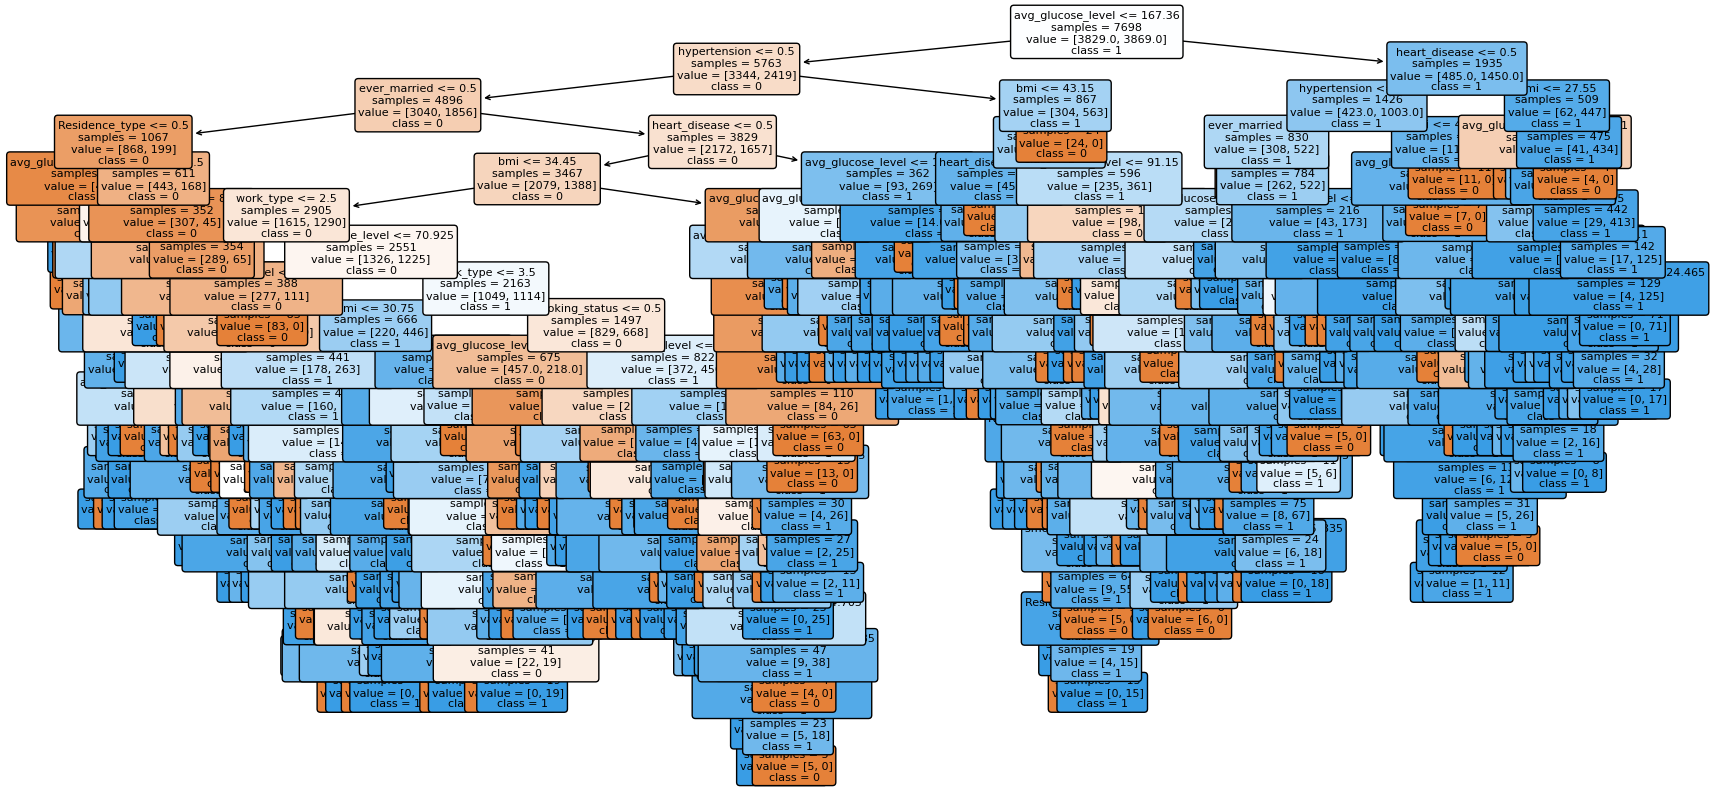

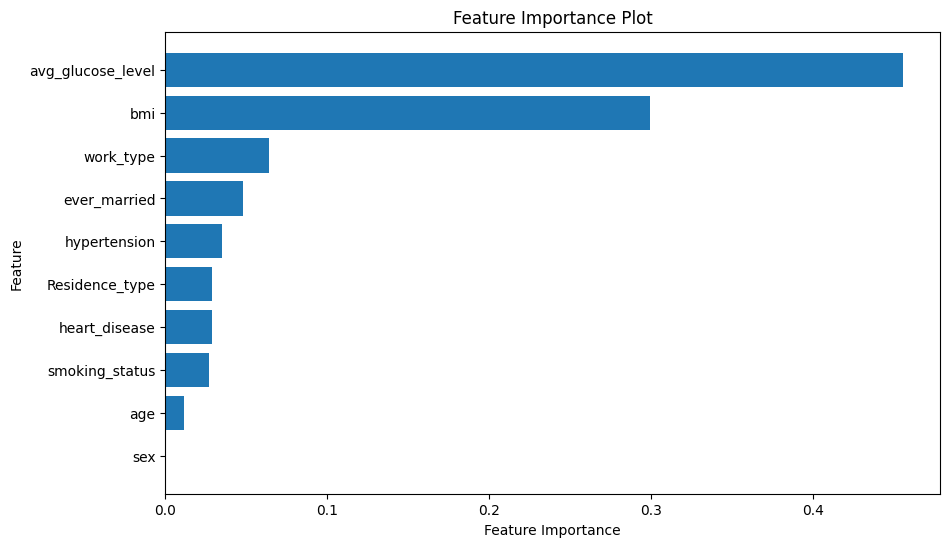

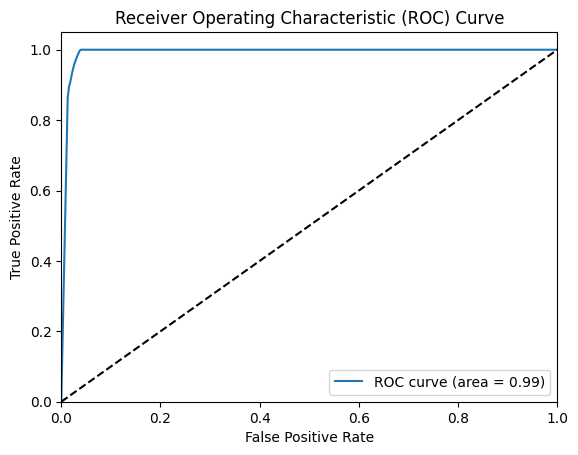

AUC Score: 0.9913041008201641


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.948051948051948, 0.9675324675324676, 0.951948051948052, 0.9584415584415584, 0.9376623376623376, 0.9701298701298702, 0.951948051948052, 0.9636363636363636, 0.9609882964889467, 0.9479843953185956]
Mean accuracy: 0.9558323341158192
95% confidence interval: (0.9486073625532788, 0.9630573056783597)


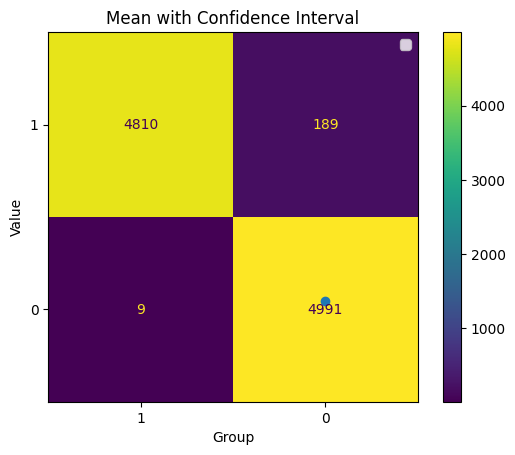

--------------------------------------


In [2]:
print('--------------------------------------')
sanity_checks_methods.print_duplicates_values(df) 

print(f'ADDING 10% TO FEATURE: avg_glucose_level \n')

# Aggiungi duplicati solo al set di addestramento
df_n = sanity_checks_methods.duplicates_values(df, 10)

sanity_checks_methods.print_duplicates_values(df_n)

# Addestra il modello utilizzando il set di addestramento con duplicati
decision_tree = ML_algorithms2.train_decision_tree_model(df_n, df_to_test)

# Valida il modello con k-fold cross-validation utilizzando solo il set di addestramento originale
ML_algorithms2.k_fold_cross_validation_dt(decision_tree, df_n)

print('--------------------------------------')